# Part 1: Wrangling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Problem 1

In [4]:
import sqlite3
import pandas

con = sqlite3.connect('/content/drive/My Drive/Colab Notebooks/lahman2014.sqlite')

teams_payroll_win = "SELECT Salaries.teamID as team_ID, W, G, W/G*100.0 as \
win_percent, SUM(salary) as total_salary, Teams.yearID FROM Salaries LEFT JOIN \
Teams ON Teams.teamID = Salaries.teamID GROUP BY Teams.teamID"

team_salaries = pandas.read_sql(teams_payroll_win, con)
team_salaries.fillna("N/A")

,team_ID,W,G,win_percent,total_salary,yearID
0,SFG,N/A,N/A,N/A,1.983172e+08,N/A
1,ANA,92.0,162.0,0.0,3.744736e+09,2004.0
2,ARI,64.0,162.0,0.0,2.056958e+10,2014.0
3,ATL,79.0,162.0,0.0,9.226439e+10,2014.0
4,BAL,96.0,162.0,0.0,9.944220e+10,2014.0
5,BOS,71.0,162.0,0.0,2.773279e+11,2014.0
6,CAL,70.0,161.0,0.0,8.703326e+09,1996.0
7,CHA,73.0,162.0,0.0,1.937846e+11,2014.0
8,CHN,73.0,162.0,0.0,2.585168e+11,2014.0
9,CIN,76.0,162.0,0.0,1.793469e+11,2014.0


The data was extracted from the sqlite file linked through github. The connector
extracts the data using the sqlite package, and the query selects the columns of data from each table, and LEFT JOINS from the Salaries table to include all the listed teamIDs. 

There was missing data for one specific entry, SFG, and those missing data points were replaces with N/A. Because we were left joining from the salaries table, this means that data from the Teams table could be missing, and in our case it is.

# Part 2: Exploratory Data Analysis

Problem 2

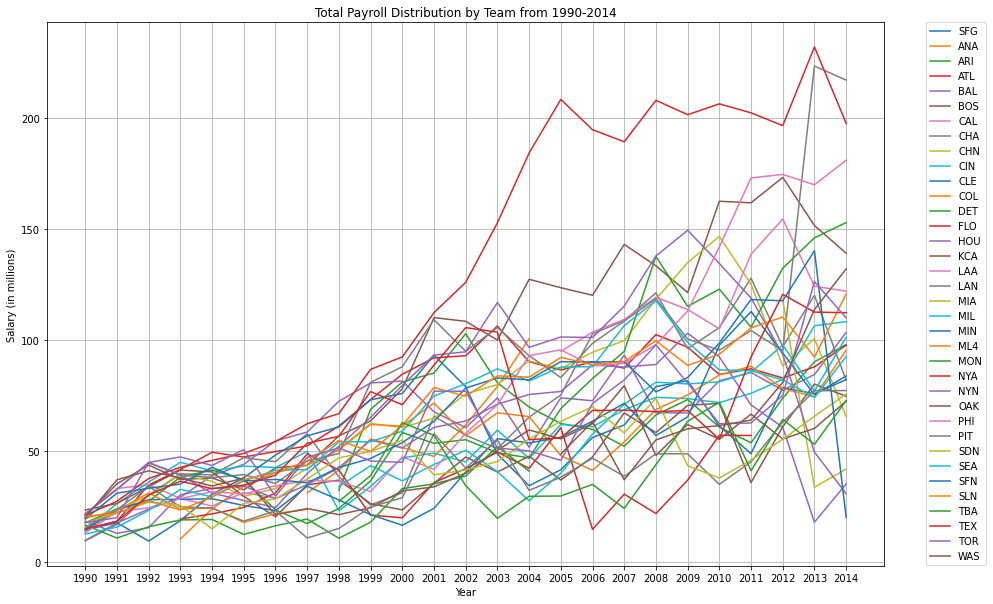

In [8]:
import matplotlib.pylab as plt
import numpy as np

plt.figure(figsize=(15,10))
plt.title("Total Payroll Distribution by Team from 1990-2014")
plt.xlabel("Year")
plt.ylabel("Salary (in millions)")
plt.xticks(np.arange(1990,2015))

for row in team_salaries.itertuples():
  team_name = row.team_ID
  query = "SELECT yearID, SUM(salary) as total_salary FROM Salaries WHERE \
  yearID >= 1990 AND yearID <= 2014 AND teamID = '"+ team_name +"' \
  GROUP BY yearID"
  current_team = pandas.read_sql(query, con)
  plt.plot(current_team.yearID, current_team.total_salary/1000000.0,
           label=team_name)

plt.grid(True)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

I used the matplotlib.pylab library was used to plot the data from the Salaries table. The table was first instantiated and labeled with the appropriate attributes. Numpy was then used to set the range of the year ticks on the x-axis. To extract the payroll data per year for each team, I first iterated over the list of teams from the dataframe. Then for each team, I
queried the salary data grouped by year and plotted the line onto the pylab
plot. Each line was colored differently  to distinguish the different teams' total payrolls.

Question 1

Looking at the plot, it's clear that the average payroll across all the teams
have increased over the years from 1990 to 2014. In addition to the mean
increasing over time, the variance and spread of the data increased dramatically
after 2002, possibly suggesting that after 2002 the total salary within the
MLB as a whole increased. This could lead to more outliers in the data
set.

Problem 3

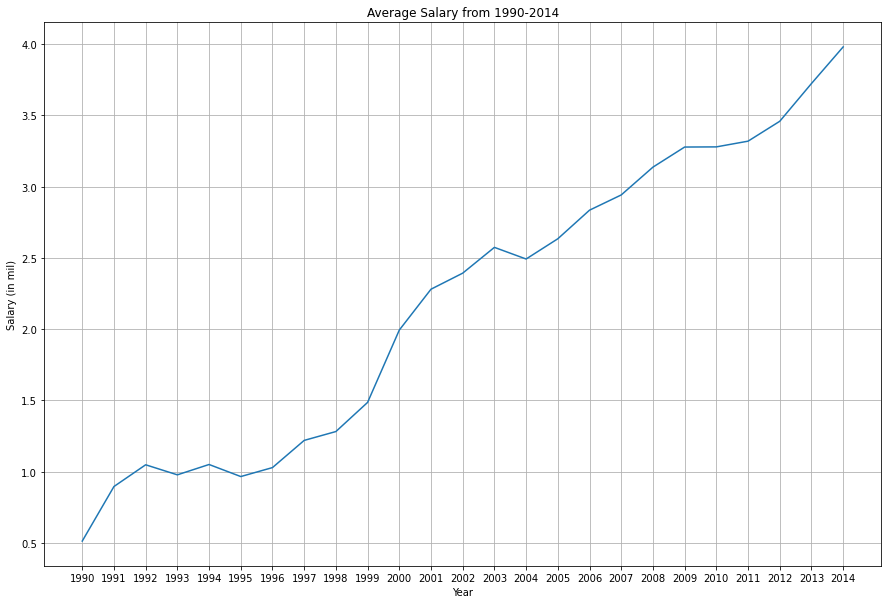

In [11]:
plt.figure(figsize=(15,10))
plt.title('Average Salary from 1990-2014')
plt.xlabel('Year')
plt.ylabel('Salary (per mil)')
plt.xticks(np.arange(1990,2015))

query = "SELECT yearID, AVG(salary) as avg_salary FROM Salaries WHERE \
yearID >= 1990 AND yearID <= 2014 GROUP BY yearID"
current_team = pandas.read_sql(query, con)

plt.grid(True)
plt.plot(current_team.yearID, current_team.avg_salary/1000000.00)
plt.show()

This plot explicitly shows the increase in average salary among all the teams per year. The AVG(salary) was queried instead of the SUM(salary).

Problem 4

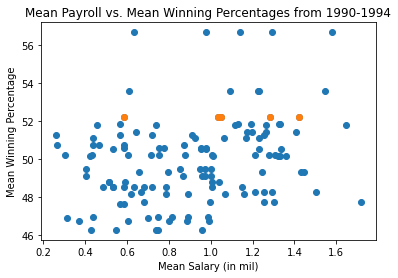

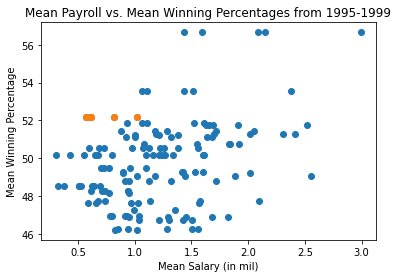

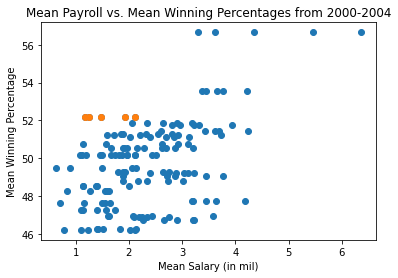

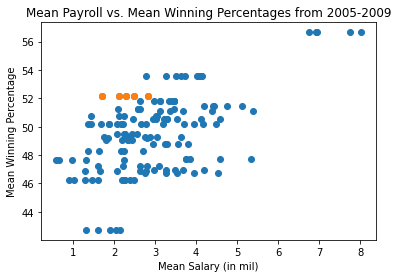

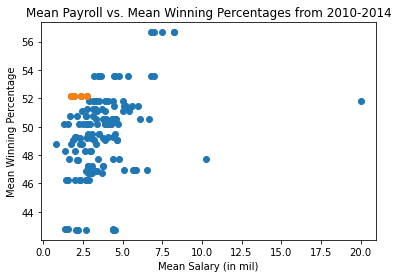

In [14]:
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, AVG(100.00*W/G) as \
win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams on \
Teams.teamID = Salaries.teamID WHERE Salaries.yearID >= 1990 and \
Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"

data_frame = pandas.read_sql(query, con)
bins_array = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
data_frame['year_cut'] = pandas.cut(data_frame.yearID, bins=5, labels=bins_array)

group1 = data_frame[data_frame['year_cut'] == 'First']
group2 = data_frame[data_frame['year_cut'] == 'Second']
group3 = data_frame[data_frame['year_cut'] == 'Third']
group4 = data_frame[data_frame['year_cut'] == 'Fourth']
group5 = data_frame[data_frame['year_cut'] == 'Fifth']

# Group1 plot
plt.figure(0)
plt.title('Mean Payroll vs. Mean Winning Percentages from 1990-1994')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Salary (in mil)')
plt.scatter(group1['mean_salary']/1000000.0, group1['win_percent'])
oakland_data = group1[(group1['team_ID'] == 'OAK')]
plt.scatter(oakland_data['mean_salary']/1000000.0, oakland_data['win_percent'])

# Group2 plot
plt.figure(1)
plt.title('Mean Payroll vs. Mean Winning Percentages from 1995-1999')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Salary (in mil)')
plt.scatter(group2['mean_salary']/1000000.0, group2['win_percent'])
oakland_data = group2[(group2['team_ID'] == 'OAK')]
plt.scatter(oakland_data['mean_salary']/1000000.0, oakland_data['win_percent'])

# Group3 plot
plt.figure(2)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2000-2004')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Salary (in mil)')
plt.scatter(group3['mean_salary']/1000000.0, group3['win_percent'])
oakland_data = group3[(group3['team_ID'] == 'OAK')]
plt.scatter(oakland_data['mean_salary']/1000000.0, oakland_data['win_percent'])

# Group4 plot
plt.figure(3)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2005-2009')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Salary (in mil)')
plt.scatter(group4['mean_salary']/1000000.0, group4['win_percent'])
oakland_data = group4[(group4['team_ID'] == 'OAK')]
plt.scatter(oakland_data['mean_salary']/1000000.0, oakland_data['win_percent'])

#Group5 plot
plt.figure(4)
plt.title('Mean Payroll vs. Mean Winning Percentages from 2010-2014')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Mean Salary (in mil)')
plt.scatter(group5['mean_salary']/1000000.0, group5['win_percent'])
oakland_data = group5[(group5['team_ID'] == 'OAK')]
plt.scatter(oakland_data['mean_salary']/1000000.0, oakland_data['win_percent'])

plt.show()

This code creates 5 different subplots that contain the mean win percentages and mean payrolls from the database, with each section representing a different time period from 1990-2014. I did this by first creating the dataframe, and then using pandas.cut() to add another column to the dataframe that designated which of the 5 equal width bins that row belonged to. I then created 5 separate dataframes containing each set of data based on the bins. The points represent each team during each of the five time periods and show the average payroll by the average winning percentage of that team.

Question 2

Given the scatter plots of the mean salary by meaning winning percentages, I can say that as the years went by, the correlation between mean salary and mean win percentage has decreased. Teams are spending less money on their players and still maintaining or improving their win percentages. There are a few outliers that continues to spend much more than the mean salary and still maintain a high average win percentage, though. The Oakland As (in orange) were efficient with their spending from 1990-2000 because the graphs show a strong positive trend in spending and win percentage. During the 2000 time period they experienced their worst spending efficiency. Overall, the Oakland As were able to maintain a fairly consistent average win percentage without increasing
spending.

# Part 3: Data Transformations

Problem 5

In [15]:
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, AVG(100.00*W/G) as \
win_percent, AVG(salary) as mean_salary FROM Salaries LEFT JOIN Teams ON \
Teams.teamID = Salaries.teamID WHERE Salaries.yearID >= 1990 and \
Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"

standard_salaries = pandas.read_sql(query, con)

year_payroll = pandas.read_sql("SELECT yearID, AVG(salary) as mean_salary FROM \
Salaries WHERE yearID >= 1990 and yearID <= 2014 GROUP BY yearID", con)

new_col = []
for row in standard_salaries.iterrows():
  team_salary = row[1]['mean_salary']
  yearID = row[1]['yearID']
  year_salary = year_payroll.loc('yearID' == yearID)[0][1]
  sd = np.std(standard_salaries[standard_salaries['yearID'] == 
                                yearID]['mean_salary'])
  if (sd != 0):
    standardized_payroll = (team_salary-year_salary)/sd
  else:
    standardized_payroll = 0
  new_col.append(standardized_payroll)


standard_salaries['standardized_payroll'] = new_col
standard_salaries

,team_ID,yearID,win_percent,mean_salary,standardized_payroll
0,ATL,1990,51.782555,4.548594e+05,-0.505638
1,BAL,1990,51.260522,2.616239e+05,-2.216369
2,BOS,1990,51.427450,6.424479e+05,1.155100
3,CAL,1990,48.171550,6.205714e+05,0.961425
4,CHA,1990,50.195230,3.061774e+05,-1.821932
...,...,...,...,...,...
724,SLN,2014,50.560881,4.310464e+06,1.142794
725,TBA,2014,46.210623,2.907564e+06,0.720725
726,TEX,2014,49.075709,4.677294e+06,1.253156
727,TOR,2014,49.287603,4.396804e+06,1.168770


This code queries all the average salaries per team by year and iterates through each combination of Team x Year to calculate the standardized payroll value for each team in each year. The yearly averages for the payroll data is then retrieved from another sql query that calculates the mean for each year. The new standard salary data is then addded to the table after every iteration of the for loop.

Problem 6

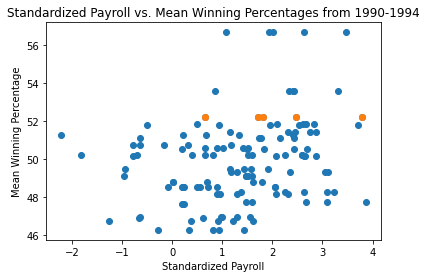

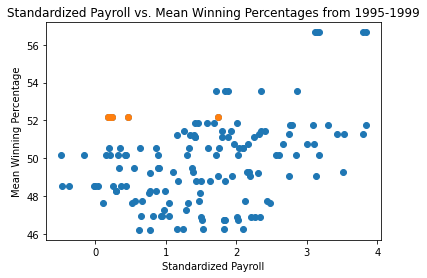

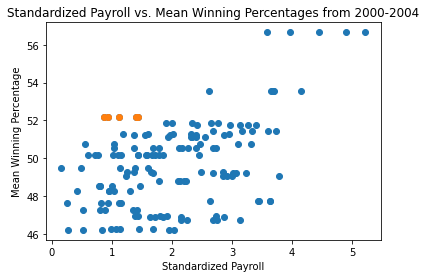

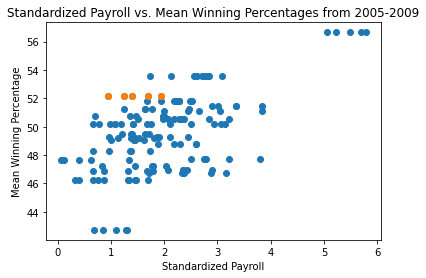

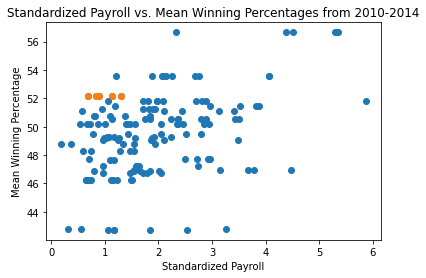

In [16]:
standard_salaries['year_cut'] = pandas.cut(standard_salaries['yearID'], bins=5,
                                           labels=bins_array)

group1 = standard_salaries[standard_salaries['year_cut'] == 'First']
group2 = standard_salaries[standard_salaries['year_cut'] == 'Second']
group3 = standard_salaries[standard_salaries['year_cut'] == 'Third']
group4 = standard_salaries[standard_salaries['year_cut'] == 'Fourth']
group5 = standard_salaries[standard_salaries['year_cut'] == 'Fifth']

# Group1 plot
plt.figure(0)
plt.title('Standardized Payroll vs. Mean Winning Percentages from 1990-1994')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Standardized Payroll')
plt.scatter(group1['standardized_payroll'], group1['win_percent'])
oakland_data = group1[(group1['team_ID'] == 'OAK')]
plt.scatter(oakland_data['standardized_payroll'], oakland_data['win_percent'])

# Group2 plot
plt.figure(1)
plt.title('Standardized Payroll vs. Mean Winning Percentages from 1995-1999')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Standardized Payroll')
plt.scatter(group2['standardized_payroll'], group2['win_percent'])
oakland_data = group2[(group2['team_ID'] == 'OAK')]
plt.scatter(oakland_data['standardized_payroll'], oakland_data['win_percent'])

# Group3 plot
plt.figure(2)
plt.title('Standardized Payroll vs. Mean Winning Percentages from 2000-2004')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Standardized Payroll')
plt.scatter(group3['standardized_payroll'], group3['win_percent'])
oakland_data = group3[(group3['team_ID'] == 'OAK')]
plt.scatter(oakland_data['standardized_payroll'], oakland_data['win_percent'])

# Group4 plot
plt.figure(3)
plt.title('Standardized Payroll vs. Mean Winning Percentages from 2005-2009')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Standardized Payroll')
plt.scatter(group4['standardized_payroll'], group4['win_percent'])
oakland_data = group4[(group4['team_ID'] == 'OAK')]
plt.scatter(oakland_data['standardized_payroll'], oakland_data['win_percent'])

# Group5 plot
plt.figure(4)
plt.title('Standardized Payroll vs. Mean Winning Percentages from 2010-2014')
plt.ylabel('Mean Winning Percentage')
plt.xlabel('Standardized Payroll')
plt.scatter(group5['standardized_payroll'], group5['win_percent'])
oakland_data = group5[(group5['team_ID'] == 'OAK')]
plt.scatter(oakland_data['standardized_payroll'], oakland_data['win_percent'])

plt.show()

In the code above, I repeated the same process that I did in problem 4, except I used the standardized_payroll column.

The standardization of the salary attribude makes it easier to spot trends and correlation. The plots from the unstandardized salaries seemed scattered and it seemed as if there were many outliers. After standardizing the salaries and measuring the metrics around the sample mean, the data became more tidy and the correlation (or lack thereof) was easier to point
out. Looking further into the standardized data, it is easier to spot out the number of teams that spent more on the players during the moneyball period but did not experiencce the expected win percentage increase. By looking at the standardized plots, I can clearly see that the Oakland As were able to maintain their win percentage without having to increase their payroll relative to the other teams.

Problem 7

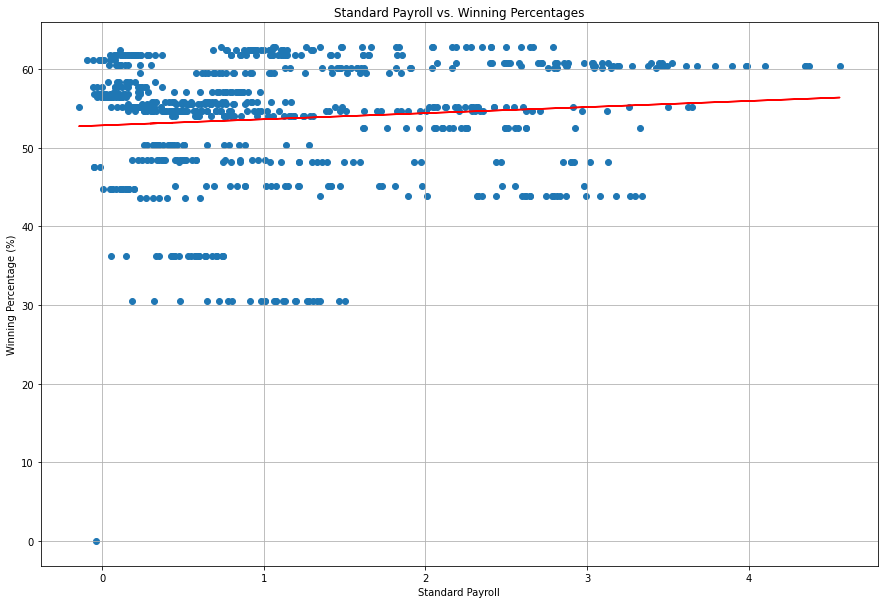

In [22]:
query = "SELECT Teams.teamID as team_ID, Salaries.yearID, 100.00*W/G as \
win_percent, SUM(salary) as total_salary FROM Salaries LEFT JOIN Teams ON \
Teams.teamID = Salaries.teamID WHERE Salaries.yearID >= 1990 and \
Salaries.yearID <= 2014 GROUP BY Salaries.yearID, Teams.teamID"

total_standard_salaries = pandas.read_sql(query, con)
year_payroll = pandas.read_sql("SELECT yearID, SUM(salary) as total_salary \
FROM Salaries WHERE yearID >= 1990 and yearID <= 2014 GROUP BY yearID", con)

new_col = []
for row in total_standard_salaries.iterrows():
  team_salary = row[1]['total_salary']
  yearID = row[1]['yearID']
  year_salary = year_payroll.loc('yearID' == yearID)[0][1]
  sd = np.std(total_standard_salaries[total_standard_salaries['yearID'] == 
                                      yearID]['total_salary'])
  if (sd != 0):
    standard_salary = (team_salary-year_salary)/sd
  else:
    standard_salary = 0

  new_col.append(standard_salary)

total_standard_salaries['standardized_payroll'] = new_col

plt.figure(figsize=(15,10))
plt.title('Standard Payroll vs. Winning Percentages')
plt.xlabel('Standard Payroll')
plt.ylabel('Winning Percentage (%)')
x = total_standard_salaries.standardized_payroll.fillna(0)
y = total_standard_salaries.win_percent.fillna(0)

standard_salaries['expected_win_pct'] = 50 + (2.5 * standard_salaries['standardized_payroll'])
standard_salaries.head()

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)
plt.grid(True)
plt.show()

The code above re-queries the data from the database, querying all of the win percentages and salaries for each team over the years 1990-2014. The salaries are standardized and then placed into the pandas dataframe using iterrows. Numpy polyfit is then used to calculate the linear regression fit for the standard salary and win percentage metrics then the data is plotted as a scatter plot. Then I added a column to the dataframe to find the expected_win_pct.

Problem 8

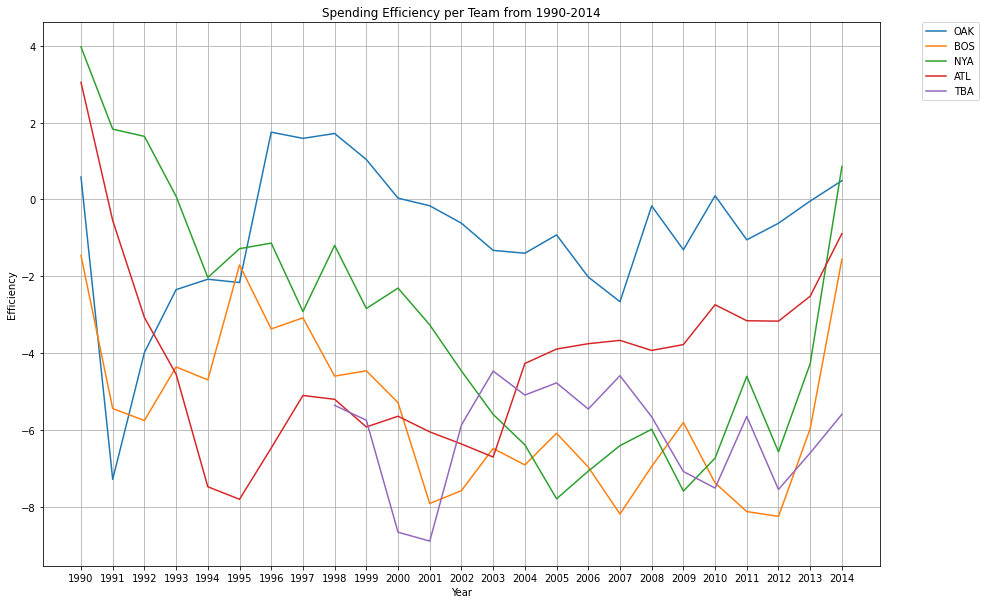

In [23]:
teams_to_plot = ["OAK", "BOS", "NYA", "ATL", "TBA"]

new_col = []
for row in standard_salaries.iterrows():
  win_percentage = row[1]['win_percent']
  yearID = row[1]['yearID']
  standard_payroll = row[1]['standardized_payroll']
  efficiency = win_percentage - (50 + (2.5 * standard_payroll))
  new_col.append(efficiency)

standard_salaries['efficiency'] = new_col

plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.title('Spending Efficiency per Team from 1990-2014')
plt.xticks(np.arange(1990, 2015))

for team in teams_to_plot:
  team_data = standard_salaries.loc[(standard_salaries['team_ID'] == team)]
  plt.plot(team_data.yearID, team_data.efficiency, label=team)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


I predefined an array for the teams to be analyzed in this question. I then added a new column called efficiency and appended it to each row in the dataframe that was used in problem 5 (standard_salaries). Using the formula given, I could calculate the spending efficiency for each team for each year. I then plotted the lines of efficiency by year for each team from 1990-2014 by iterating over the teams arry and using plot().

Question 4

From this graph, we can visualize the spending efficiency of each team over
each year. The general trend of the efficiency decreases starting at 1990, but as the year 2003 passes, the efficiency tends to increase among the five selected teams. Overall, the spread of the data is consistent throughout the years. Compared to the previous plots, this graph clearly shows how the Oakland As were able to increase their win percentage without spending more money based on the standardized payroll scale among the five teams that were being compared. Although the spending efficiency of OAK from 1996-2007 decreased, OAK was still able to beat out the other five teams in terms of their player-signing ability.

In [24]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Project2.ipynb')

--2022-03-20 07:33:13--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-03-20 07:33:13 (36.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project2.ipynb to pdf
[NbConvertApp] Support files will be in Project2_files/
[NbConvertApp] Making directory ./Project2_files
[NbConvertApp] Making directory ./Project2_files
[NbConvertApp] Making directory ./Project2_files
[NbConvertApp] Making directory ./Project2_files
[NbConvertApp] Making directory 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [25]:
%%shell
jupyter nbconvert --to html /content/Project2.ipynb

[NbConvertApp] WARNING | pattern '/content/Project2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu

CalledProcessError: ignored